# Learning CStree using Gibbs sampler

In [32]:
import sys
import logging
import random

from causallearn.search.ConstraintBased.PC import pc
import pandas as pd
import matplotlib.pyplot as plt
import cstrees.cstree as ct
import cstrees.scoring as sc
import cstrees.stage as st
import cstrees.learning as ctl
import networkx as nx
import numpy as np
import pp

%load_ext autoreload
%autoreload 2
#logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
logging.basicConfig(stream=sys.stderr, level=logging.ERROR)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/f/l/flrios/NOBACKUP/flrios/miniconda3/envs/cstrees/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Sample a random CStree

In [80]:
np.random.seed(1)
random.seed(1)
p = 20
cards = [2] * p

t = ct.sample_cstree(cards, 2, 0.5, 1)
t.sample_stage_parameters(alpha=2)

level 0
level 1
level 2
level 3
level 4
level 5
level 6
level 7
level 8
level 9
level 10
level 11
level 12
level 13
level 14
level 15
level 16
level 17
level 18


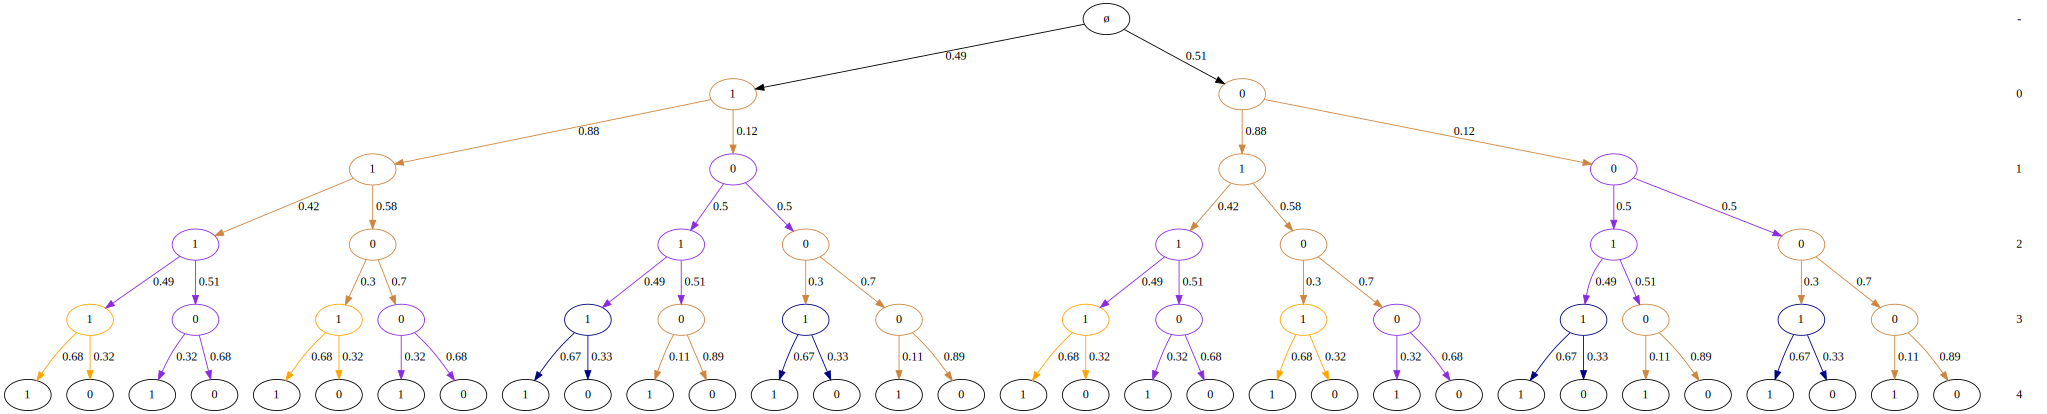

In [26]:
t.plot()

In [22]:
agraphs= t.to_minimal_context_agraphs()
print(len(agraphs))

1


None


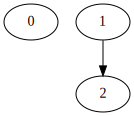

In [5]:
keys = list(agraphs.keys())
print(keys[0])
agraphs[keys[0]]


In [81]:
np.random.seed(6)
x2 = t.sample(5000)
x2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,0,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,1,1
3,0,0,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,1
4,0,0,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,0,1,1,1,1
4997,0,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0
4998,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1
4999,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0


## Create the score tables

In [82]:
t.labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [83]:
poss_cvars = {l:random.sample(list(set(t.labels) - {l}) ,k=5) for l in t.labels}
poss_cvars

{0: [10, 1, 14, 5, 11],
 1: [13, 9, 6, 3, 14],
 2: [0, 12, 9, 14, 16],
 3: [18, 10, 5, 15, 14],
 4: [9, 16, 6, 15, 19],
 5: [1, 9, 17, 3, 12],
 6: [19, 14, 2, 12, 1],
 7: [15, 0, 5, 17, 12],
 8: [2, 13, 9, 10, 3],
 9: [17, 6, 7, 11, 4],
 10: [2, 19, 17, 12, 7],
 11: [17, 18, 1, 5, 4],
 12: [18, 8, 11, 7, 6],
 13: [18, 12, 5, 16, 19],
 14: [8, 10, 7, 19, 9],
 15: [7, 0, 12, 10, 14],
 16: [13, 7, 8, 6, 1],
 17: [5, 14, 4, 8, 7],
 18: [16, 5, 4, 19, 14],
 19: [14, 11, 9, 12, 3]}

In [84]:
score_table, context_scores, context_counts = sc.order_score_tables(x2, 
                                                                    max_cvars=2, 
                                                                    alpha_tot=1.0,
                                                                    method="BDeu",
                                                                    poss_cvars=poss_cvars)

Order score tables: 100%|██████████| 20/20 [00:02<00:00,  9.27it/s]


## The order score tables

In [85]:
score_table

{'poss_cvars': {0: [10, 1, 14, 5, 11],
  1: [13, 9, 6, 3, 14],
  2: [0, 12, 9, 14, 16],
  3: [18, 10, 5, 15, 14],
  4: [9, 16, 6, 15, 19],
  5: [1, 9, 17, 3, 12],
  6: [19, 14, 2, 12, 1],
  7: [15, 0, 5, 17, 12],
  8: [2, 13, 9, 10, 3],
  9: [17, 6, 7, 11, 4],
  10: [2, 19, 17, 12, 7],
  11: [17, 18, 1, 5, 4],
  12: [18, 8, 11, 7, 6],
  13: [18, 12, 5, 16, 19],
  14: [8, 10, 7, 19, 9],
  15: [7, 0, 12, 10, 14],
  16: [13, 7, 8, 6, 1],
  17: [5, 14, 4, 8, 7],
  18: [16, 5, 4, 19, 14],
  19: [14, 11, 9, 12, 3]},
 'scores': {0: {'None': -3320.863858505309,
   '1': -3321.4895933144116,
   '5': -3321.4972501894545,
   '10': -3321.4970773950513,
   '11': -3321.4948783252757,
   '14': -3321.367469964442,
   '1,5': -3322.813122056509,
   '1,10': -3322.812934302829,
   '1,11': -3322.8107457486412,
   '1,14': -3322.682302609918,
   '5,10': -3322.8206982535,
   '5,11': -3322.8182795351217,
   '5,14': -3322.6869604910007,
   '10,11': -3322.818300356906,
   '10,14': -3322.6899286431026,
   '11,14':

## The context score tables

In [86]:
context_scores

{'cards': {0: 2,
  1: 2,
  2: 2,
  3: 2,
  4: 2,
  5: 2,
  6: 2,
  7: 2,
  8: 2,
  9: 2,
  10: 2,
  11: 2,
  12: 2,
  13: 2,
  14: 2,
  15: 2,
  16: 2,
  17: 2,
  18: 2,
  19: 2},
 'scores': {0: {'None': -3317.868126231755,
   '1=0': -1183.058830490495,
   '1=1': -2138.928977173997,
   '5=0': -1430.3233472489774,
   '5=1': -1892.312690750392,
   '10=0': -1688.8379331370488,
   '10=1': -1633.7778044704673,
   '11=0': -1944.9564574470278,
   '11=1': -1377.431306691733,
   '14=0': -924.5169650599187,
   '14=1': -2395.2599902121055,
   '1=0,5=0': -533.4542394968782,
   '1=0,5=1': -654.4853005182927,
   '1=1,5=0': -901.3412706135805,
   '1=1,5=1': -1242.7239950815292,
   '1=0,10=0': -605.0879354471083,
   '1=0,10=1': -582.7314089854992,
   '1=1,10=0': -1088.6767153220649,
   '1=1,10=1': -1055.451494759544,
   '1=0,11=0': -464.29376378269967,
   '1=0,11=1': -723.6406597967314,
   '1=1,11=0': -1485.2904632407335,
   '1=1,11=1': -658.6488880454615,
   '1=0,14=0': -321.90106726406077,
   '1=0,1

## Run the Gibbs sampler

In [87]:
orders2, scores2 = ctl.gibbs_order_sampler(2000, score_table)

initial order: [14, 12, 17, 10, 11, 4, 13, 8, 0, 16, 1, 7, 5, 18, 15, 19, 2, 9, 6, 3]
initial score: -64424.98914130741


Gibbs order sampler:   0%|          | 0/2000 [00:00<?, ?it/s]

Gibbs order sampler: 100%|██████████| 2000/2000 [00:01<00:00, 1286.80it/s]


### Trajectory score plots

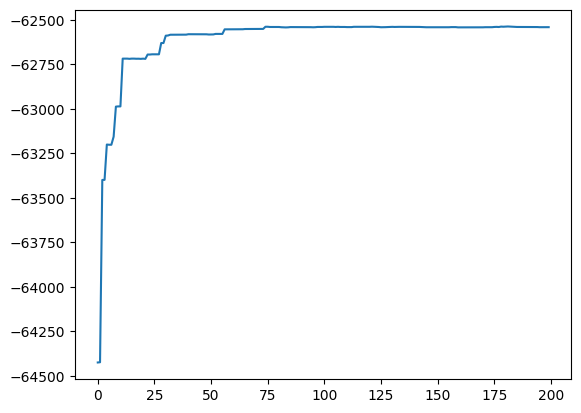

In [88]:
plt.plot(scores2[:200])

### Order position plots

Get the individual variables locations in the order and plot them

In [89]:
var_positions = {var: [x.index(var) for x in orders2] for var in orders2[0]}
var_positions["iteration"] = list(range(len(orders2))) 
plotdf = pd.DataFrame(var_positions)

<AxesSubplot: xlabel='iteration'>

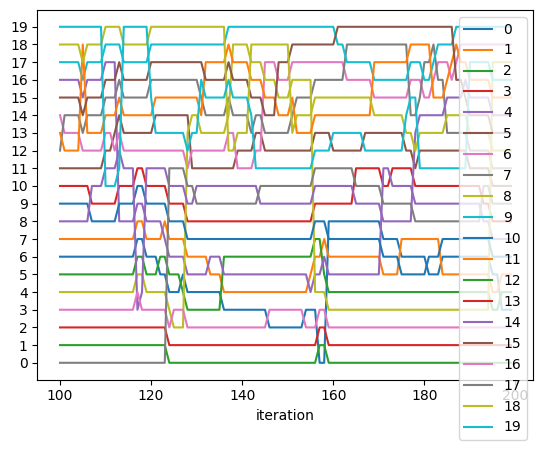

In [90]:
plotdf[100:200].plot(x = "iteration", y = range(p), yticks=range(len(orders2[0])))

### Get the maximal scoring order

In [91]:
max(scores2)

-62537.44515947902

In [92]:
maxi = scores2.index(max(scores2))

In [93]:
maporder = orders2[maxi]
maporder

[0, 12, 13, 16, 17, 8, 4, 1, 2, 14, 10, 3, 5, 6, 18, 19, 9, 11, 7, 15]

### Get the maximal scoring CStree for the order

In [77]:
opttree = ctl._optimal_cstree_given_order(maporder, context_scores)

## Estimate the CStree parameters

In [78]:
opttree.estimate_stage_parameters(x2, alpha_tot=2.0, method="BDeu")
opttree.plot()

## Plot the DAG representation

In [20]:
agraphs= opttree.to_minimal_context_agraphs()

None


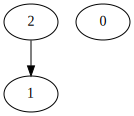

In [21]:
keys = list(agraphs.keys())
print(keys[0])
agraphs[keys[0]]
